# Use Jupyter Notebook with an SPARQL endpoint

This Jupyter Notebook explores how to interact with the eProcurement Open Data endpoint using Python and SPARQL. By leveraging SPARQL's ability to query specific data and the powerful analysis features of pandas DataFrames, you can gain valuable insights from eProcurement notices.



## Running this notebook

If you haven't already, install Jupyter Notebook in your Python environment. You can do this via pip:

```sh
pip install notebook
```

When installed, Open your command prompt or terminal, navigate to the directory where you want to store your notebook, and run the following command:

```sh
jupyter notebook
```

In [1]:
### Installing the dependencies
!pip install --user sparqldataframe pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## SPARQL endpoint

The data of Notices is available through the [SPARQL endpoint](https://publications.europa.eu/webapi/rdf/sparql), which can be accessed through the TED Open Data Service [query editor](https://data.ted.europa.eu/). You can use it to access and analyze data without the need of downloading all Notices

## Example

Python offers several libraries to interact with SPARQL endpoints. This example utilizes `sparqldataframe` for querying the endpoint, fetching results directly into a pandas Dataframe for further analysis.

The following is a query that counts all the notices published in certain date, in this case "2024-11-04"^^xsd:date


In [3]:
import sparqldataframe

In [4]:
counts = sparqldataframe.query("https://publications.europa.eu/webapi/rdf/sparql",""" 
PREFIX epo: <http://data.europa.eu/a4g/ontology#>

SELECT (COUNT(?Notice) AS ?NoticeCount) 
WHERE {
    ?Notice a epo:Notice ;
            epo:hasPublicationDate "2024-11-04"^^xsd:date .
}""")    


The data is now contained in a dataframe, with one element

In [5]:
counts.head()

,NoticeCount
0,2063


Let's move into a more complex example. 

The following query retrieves information about buyers announced in notices published on a specific date. It returns the legal names of the buyers and their country

In [19]:
import sparqldataframe

sparql_query = """
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX epo: <http://data.europa.eu/a4g/ontology#>  
PREFIX cccev: <http://data.europa.eu/m8g/>  
PREFIX org: <http://www.w3.org/ns/org#>  
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>  
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>  
  
SELECT distinct ?publicationNumber ?legalName ?country WHERE {
  
  GRAPH ?g {
      ?notice a epo:Notice ; 
        epo:hasPublicationDate "2024-11-04"^^xsd:date ;
        epo:hasNoticePublicationNumber ?publicationNumber ;
        epo:announcesRole [  
          a epo:Buyer ;  
           epo:playedBy [
                  epo:hasLegalName ?legalName ;
                  cccev:registeredAddress [
                    epo:hasCountryCode ?countryUri
                ] 
            ]  
        ] .
  }
  
  ?countryUri a skos:Concept ;
      skos:prefLabel ?country .
      FILTER (lang(?country) = "en")

} 
"""
df = sparqldataframe.query(
  "https://publications.europa.eu/webapi/rdf/sparql",
  sparql_query)

In [20]:
df.head()

,publicationNumber,legalName,country
0,00666374-2024,Goethe-Institut e.V. - Zentrale,Germany
1,00666472-2024,stad Brugge,Belgium
2,00666268-2024,GELSENDIENSTE,Germany
3,00666984-2024,Landkreis Berchtesgadener Land,Germany
4,00667208-2024,Stadt Braunschweig Fachbereich Bauordnung und ...,Germany


In [21]:
df.describe()

,publicationNumber,legalName,country
count,1341,1341,1341
unique,1141,1094,29
top,00667115-2024,"Nemocnice Pardubického kraje, a.s.",Germany
freq,37,11,345


<Axes: xlabel='country'>

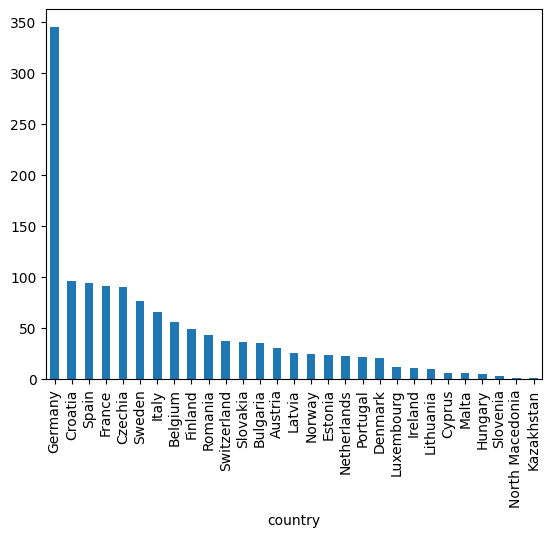

In [22]:

df['country'].value_counts().plot(kind='bar')

## Conclusion


As demonstrated, it is direct to integrate the values from a SPARQL endpoint into a DataFrame, unlocking the rich functionality of pandas to analyze data. 